In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
data = pd.read_csv('pokemon_data.csv')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [35]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [36]:
x_train = train_data.Attack
y_train = train_data.Defense

In [37]:
def loss_function(m,b,points):
    total_error=0

    for i in range(len(points)):
        x = points.iloc[i].Attack
        y = points.iloc[i].Defense
        total_error += (y-(m*x+b))**2
        total_error/float(len(points))

In [38]:
def gradient_descent(m_now,b_now,points,L):
    m_gradient = 0
    b_gradient = 0

    n=len(points)

    for i in range(n):
        x=points.iloc[i].Attack
        y=points.iloc[i].Defense

        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L

    return m,b


In [39]:
m = 0
b = 0
L = 0.0001
epochs = 300

# Use the training data for gradient descent
for i in range(epochs):
    m,b=gradient_descent(m,b,train_data,L)

print(m,b)


0.8487188160240232 0.3345726744986366


In [40]:
x_test = test_data.Attack
y_test = test_data.Defense
test_loss = loss_function(m,b,test_data)
print(test_loss)


None


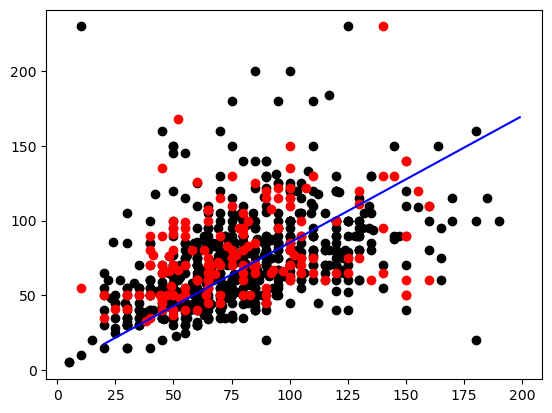

In [41]:
plt.scatter(train_data.Attack,train_data.Defense,color = "black")
plt.scatter(test_data.Attack,test_data.Defense,color = "red")
plt.plot(list(range(20,200)),[m*x+b for x in range(20,200)],color="blue")
plt.show()

In [43]:
print("the black plots represent training data")
print("the red plots represent testing data")

the black plots represent training data
the red plots represent testing data
